# ARBRE DE DÉCISION : PRÉDICITON DE VENTES DE MAISON 


In [788]:
# IMPORTATION DE TOUTES LES LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

L'objectif est d'appliquer plusieurs méthodes de machines learning afin de prédire la vente d'une maison . 
Pour cela , nous avons pris une base de données test qui est composée de 80 variables.
La variable à prédire est "SalePrice"

IMPORTATION DE LA BASE DE DONNÉES

In [789]:
path = "/Users/keitasita/Desktop/Arbre de décision Python/Test prix des maisons .csv"

In [790]:
# Importation du jeu d'entraînement
maison_test = pd.read_csv(path, sep= ";",
              na_values ="?" )
                            

In [791]:
maison_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,208500,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,181500,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,223500,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,140000,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,250000,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,185000,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,175000,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,210000,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,266500,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


VISUALISATION DES VARIABLES 

In [792]:
maison_test.info()# On regarde le type de chaque variable .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   SalePrice      1459 non-null   int64  
 2   MSSubClass     1459 non-null   int64  
 3   MSZoning       1455 non-null   object 
 4   LotFrontage    1232 non-null   float64
 5   LotArea        1459 non-null   int64  
 6   Street         1459 non-null   object 
 7   Alley          107 non-null    object 
 8   LotShape       1459 non-null   object 
 9   LandContour    1459 non-null   object 
 10  Utilities      1457 non-null   object 
 11  LotConfig      1459 non-null   object 
 12  LandSlope      1459 non-null   object 
 13  Neighborhood   1459 non-null   object 
 14  Condition1     1459 non-null   object 
 15  Condition2     1459 non-null   object 
 16  BldgType       1459 non-null   object 
 17  HouseStyle     1459 non-null   object 
 18  OverallQ

Le constat est que la majorité des variables sont des variables catégorielles . Nous remarquons que certaines variables ont peu de valeurs non nulles.Il s'agit des variables Alley ,FireplaceQu , PoolQC ,Fence  et MiscFeature.C'est du au fait que le NA ou les valeurs manquantes sont considérés comme une modalité pour cetraines variables catégorielles. Nous remarquons également que certaines variables catégorielles ont été converties comme des variables numériques .

Nous convertissons certaines variables dans leur format idéal

In [793]:
maison_test[['MSSubClass', 'OverallQual', 'OverallCond']] = maison_test[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [794]:
maison_test.dtypes[maison_test.dtypes==object]

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC          

In [795]:
print('Maison test | Data Types')
print('Object: ', maison_test.dtypes[maison_test.dtypes==object].count())
print('Numeric: ',maison_test.dtypes[maison_test.dtypes!=object].count())

Maison test | Data Types
Object:  46
Numeric:  35


Nous avons alors au total 46 variables qui sont catégorielles et 35 variables qui sont numériques. Cependant, nous remarquons que certaines variables ont peu de valeurs non nulles.Il s'agit des variables Alley ,FireplaceQu , PoolQC ,Fence et MiscFeature.C'est du au fait que le NA est considéré comme une modalité. Le meme problème existe pour les variables : GarageYrBlt ,BsmtFullBath ,BsmtHalfBath ,GarageArea,GarageCars ,MasVnrArea ,TotalBsmtSF ,BsmtUnfSF ,BsmtFinSF2,BsmtFinSF1 qui ont leur 0 considéré comme une modalité. Nous tacherons de le prendre en compte. 

Nous séparons notre base de données en deux parties : une base contenant les variables numériques et une autre base contenant les varaibles numériques

In [796]:
maison_test_cat= pd.DataFrame(maison_test,columns = ["Id", "MSSubClass","MSZoning"
    ,"Street","Alley","LotShape","LandContour","Utilities","LotConfig"
    ,"LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual"
    ,"OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType"
    ,"ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"
    ,"Heating","HeatingQC","CentralAir","Electrical","KitchenQual","Functional","FireplaceQu"
    ,"GarageType","GarageFinish","GarageQual","GarageCond","PavedDrive"                                         
    ,"PoolQC","Fence","MiscFeature"
    ,"SaleType","SaleCondition"])

maison_test_cat contient les variables qualitatives ou catégorielles 

In [797]:
maison_test_cat.info()# On vérifie si les variables ont été bien converties.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1459 non-null   int64 
 1   MSSubClass     1459 non-null   object
 2   MSZoning       1455 non-null   object
 3   Street         1459 non-null   object
 4   Alley          107 non-null    object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   Utilities      1457 non-null   object
 8   LotConfig      1459 non-null   object
 9   LandSlope      1459 non-null   object
 10  Neighborhood   1459 non-null   object
 11  Condition1     1459 non-null   object
 12  Condition2     1459 non-null   object
 13  BldgType       1459 non-null   object
 14  HouseStyle     1459 non-null   object
 15  OverallQual    1459 non-null   object
 16  OverallCond    1459 non-null   object
 17  RoofStyle      1459 non-null   object
 18  RoofMatl       1459 non-null

In [798]:

maison_test_num= pd.DataFrame(maison_test,columns = ["Id", "SalePrice","LotFrontage"
    ,"LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2"
    ,"BsmtUnfSF","TotalBsmtSF ","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath"
    ,"BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd"
    ,"Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF"
    ,"EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"
    ,"MiscVal","MoSold","YrSold"])


maison_test_num représente les variables numériques.

In [799]:
maison_test_num.info()# on vérifie si les variables ont été bien converties 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   SalePrice      1459 non-null   int64  
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1444 non-null   float64
 7   BsmtFinSF1     1458 non-null   float64
 8   BsmtFinSF2     1458 non-null   float64
 9   BsmtUnfSF      1458 non-null   float64
 10  TotalBsmtSF    0 non-null      float64
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1457 non-null   float64
 16  BsmtHalfBath   1457 non-null   float64
 17  FullBath       1459 non-null   int64  
 18  HalfBath

EXPLORATION DES DONNÉES

VISUALISATION DE LA VARIABLE À PRÉDIRE 

In [800]:
maison_test.SalePrice.describe().to_frame()

,SalePrice
count,1459.000000
mean,180944.102810
std,79464.918335
min,34900.000000
25%,129950.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [801]:
# Concernant la statistique descriptive de notre variable à prédire , le prix de vente d'une maison est d'environ 180944,92$ en moyenne 
#suivant notre échantillon. Le prix de vente maximun d'une maison est de 755000$ alors que son prix de vente minimun est de 34900$.
#Sur les 25% des observations , le prix de vente d'une maison est inférieur ou égal à 129950$. 
#Or sur les 75 % des observations , le prix de vente d'une maison est inférieur ou égal à 214000$. 
# Le prix de vente d'une maison médian est de 163000$.

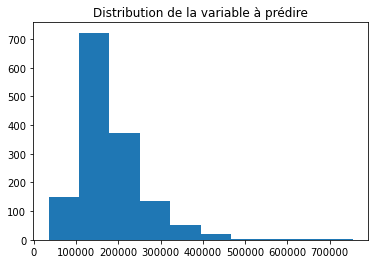

In [802]:
plt.hist(
    maison_test["SalePrice"],
    bins = 10
)
plt.title("Distribution de la variable à prédire")
plt.show()

Notre variable à prédire est déséquilibrée , dans le sens ou elle n'est pas symmétrique . Notre variable à prédire ne suit pas une loi normale.


In [803]:
maison_test.SalePrice.skew()# Nous calculons la skewness de notre variable 

1.8817600468196507

La skewness est supérieure à 0. Il existe une asymétrie positive. La majorité des variables se situent à gauche et les outliers à droite.

In [804]:
maison_test.SalePrice.kurtosis()# Nous avons caluler le Kurtosis de la variable à expliquer

6.529881857549899

La variable à  prédire a une distribution leptokurtique. 

VISUALISATION DES VARIABLES NUMÉRIQUES 

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF '}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>],
       [<AxesSubplot:title={'center':'Kitche

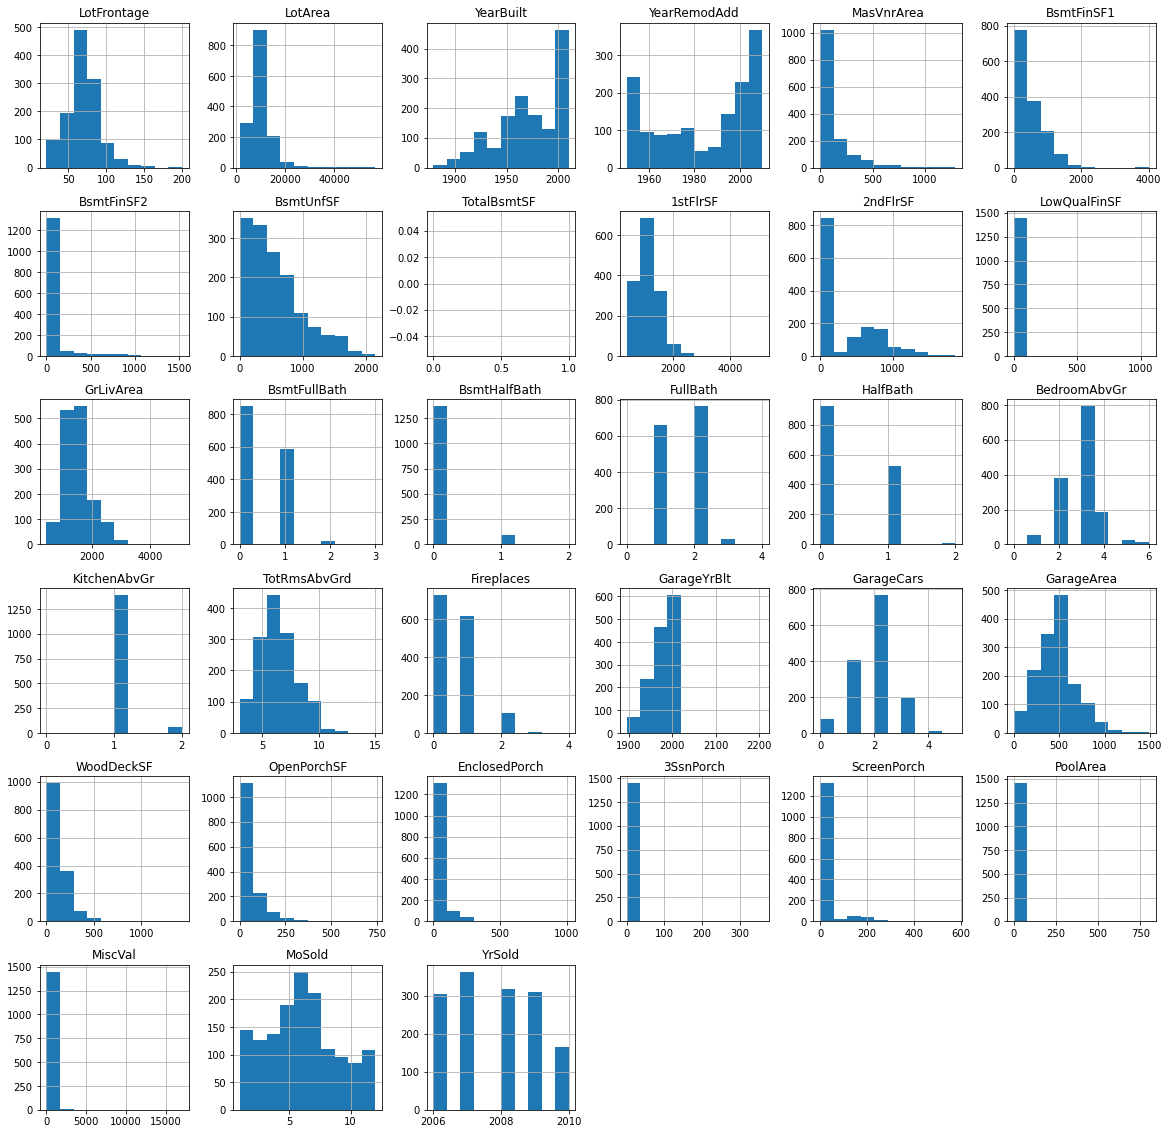

In [805]:
maison_test_num.hist(column=["LotFrontage"
    ,"LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2"
    ,"BsmtUnfSF","TotalBsmtSF ","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath"
    ,"BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd"
    ,"Fireplaces","GarageYrBlt","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF"
    ,"EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"
    ,"MiscVal","MoSold","YrSold"],figsize = (20 , 20))


Les variables numériques n'ont pas une distribution symétrique.  Leur distribution semble etre leptokurtique.

VISUALISATION DE CERTAINES VARIABLES CATÉGORIELLES 

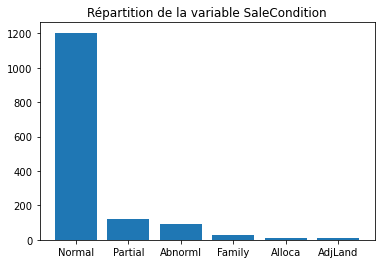

In [806]:
plt.bar(
    maison_test.SaleCondition.value_counts().index,
     maison_test.SaleCondition.value_counts().values
)
plt.title("Répartition de la variable SaleCondition")
plt.show()

On constate que la majeure partie des conditions de ventes des maisons se sont passées dans des conditons normales. 


In [807]:
maison_test.SaleCondition.value_counts()

Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
Name: SaleCondition, dtype: int64

Pour aller en profondeurs , sur les 1459 ventes , 1204 ventes de maisons se sont passées dans les conditions normales de ventes . 120 ventes se sont passées dans des conditions dites partiales . C'est à dire la maison n'était pas achevée lors de la dernière évaluation. 89 ventes de maisons se sont passées dans des condtions anorales. 26 ventes ont été conclues entre membres de meme famille . Enfin , 8 ventes de maison se sont réalisées sur l'achat d'un terrain contigu. 

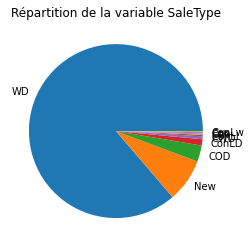

In [808]:
plt.pie(
   maison_test.SaleType.value_counts(normalize = True).values,
    labels = maison_test.SaleType.value_counts(normalize = True).index,
)
plt.title("Répartition de la variable SaleType")
plt.show()


Sur le graphique , ci-dessus , la majorité des vente de maison a été réalisée sur le type WD , soit dans l'acte de garantie de type conventionnel.

In [809]:
maison_test.SaleType.value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
Con         3
ConLw       3
Name: SaleType, dtype: int64

Pour approfondir , sur les 1459  ventes de maisons , 1258 ventes de maisons étaient des ventes avec une garantie de type conventionel . 117 ventes se sont portées sur des maisons qui venaient justes d'etre construite .44 ventes de maisons se sont faites avec un officier de justice ou l'Éat. 17 ventes ont été des contrats à faible acompte . 8 ventes de maison étaient des des ventes avec une garantie de type Argent comptant.4 des ventes de maisons sont des contrats à faible taux d'intérêt.4 autres encore sont d'un type Autre. 3 ventes de maisons sont des contrats avec 15% d'acompte dans des conditions normales. Enfin 3 ventes de maisons sont des ventes aves un faible mise de fonds et faible taux d'intérêt

IDENTIFICATION DES VALEURS MANQUANTES



In [810]:
na = maison_test.isna().sum()/maison_test.shape[0]*100
na.sort_values()

Id              0.000000
Foundation      0.000000
HeatingQC       0.000000
CentralAir      0.000000
Electrical      0.000000
                 ...    
FireplaceQu    50.034270
Fence          80.123372
Alley          92.666210
MiscFeature    96.504455
PoolQC         99.794380
Length: 81, dtype: float64

On constate que les variables FireplaceQu , Fence , Alley , MiscFeature  et PoolQC ont plus de 50% de variables manquantes. Mais comme il a été dit plutot , ces valeurs manquantes sont prises comme modalités pour ces variables. Alors nous ne pouvons pas les supprimer. Nous allons supprimer les valeurs manquantes des autres variables 


DÉTECTION DES OUTLIERS POUR LES VARIABLES NUMÉRIQUES 

Nous allons passer à la détection des valeurs aberrantes. Pour cela , nous utilisons les boxplots.

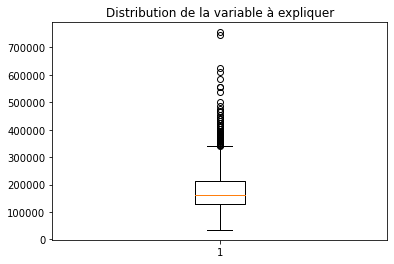

In [811]:
plt.boxplot(maison_test.SalePrice)

plt.title("Distribution de la variable à expliquer")
plt.show()

Nous constatons que notre varaible à prédire présente beaucoup de outliers.

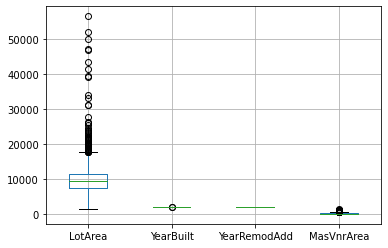

In [812]:
boxplot0 = maison_test.boxplot(column = ["LotArea"
    ,"YearBuilt"
    ,"YearRemodAdd","MasVnrArea"])

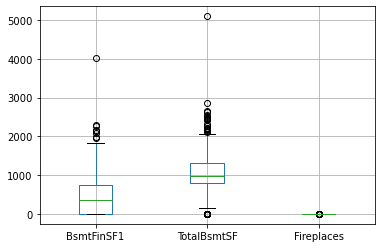

In [813]:
boxplot = maison_test.boxplot(column = ["BsmtFinSF1"
    ,"TotalBsmtSF"
    ,"Fireplaces"])

Notre variable à prédire détient beaucoup de valeurs aberrantes. 



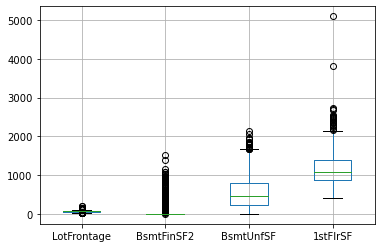

In [814]:
boxplot1 = maison_test_num.boxplot(column = ["LotFrontage"
    ,"BsmtFinSF2"
    ,"BsmtUnfSF","1stFlrSF"])

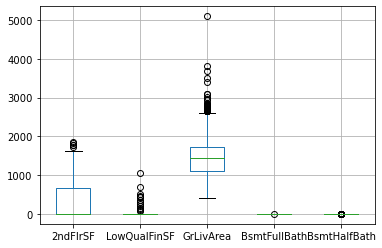

In [815]:
boxplot2 = maison_test_num.boxplot(column = ["2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath"
    ,"BsmtHalfBath"])

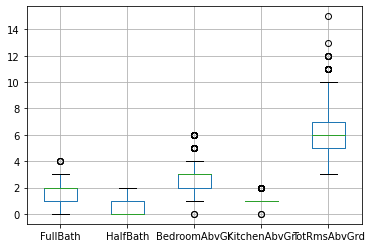

In [816]:
boxplot3 = maison_test_num.boxplot(column = ["FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd"])

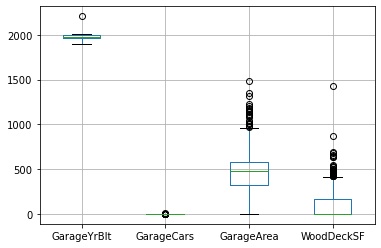

In [817]:
boxplot4 = maison_test_num.boxplot(column = ["GarageYrBlt","GarageCars","GarageArea","WoodDeckSF"])

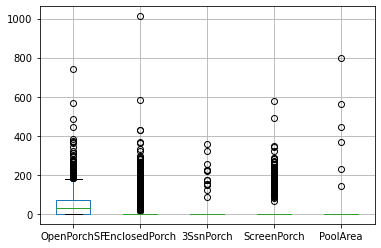

In [818]:
boxplot5 = maison_test_num.boxplot(column = ["OpenPorchSF"
    ,"EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea"])

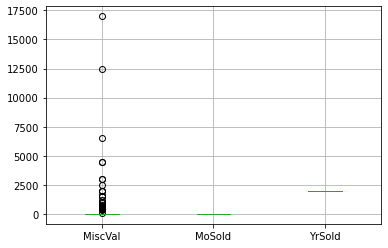

In [819]:
boxplot6 = maison_test_num.boxplot(column = ["MiscVal","MoSold","YrSold"])

Nous constatons que presque toutes les variables quantitatives présentent des outliers ou valeurs aberrantes. Il n'y a que les variables 
MoSold , YrSold , YearRemodAdd et HalfBath qui ne présentent pas de valeurs aberrantes. Les variables FullBath , YearBuilt , GarageYrBlt,BsmtFullBath ,GarageCars, Fireplaces et BsmtHalfBath présentent un outlier. 

Nous allons appliquer le test de Grubbs pour vérifier si les variables FullBath , YearBuilt , GarageYrBlt,BsmtFullBath ,GarageCars, Fireplaces et BsmtHalfBath présentent un et un seul outlier. 

In [820]:
!pip install outlier_utils


In [821]:
import numpy as np
import scipy.stats as stats

In [822]:
x = np.array([12,13,14,19,21,23])

In [823]:
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers\n")
    else:
        print("From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers\n")
grubbs_test(maison_test.FullBath)

Grubbs Calculated Value: 4.376689708478301
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [824]:
grubbs_test(maison_test.FullBath)

Grubbs Calculated Value: 4.376689708478301
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [825]:
grubbs_test(maison_test.YearBuilt)

Grubbs Calculated Value: 3.0401194893763335
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is lesser than critical value, Accept null hypothesis and conclude that there is no outliers



In [826]:
grubbs_test(maison_test.BsmtHalfBath)

Grubbs Calculated Value: 7.666158988691879
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [827]:
grubbs_test(maison_test.GarageYrBlt)

Grubbs Calculated Value: 8.677701291208985
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [828]:
grubbs_test(maison_test.BsmtFullBath)

Grubbs Calculated Value: 4.836405227758401
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



In [829]:
grubbs_test(maison_test.GarageCars)

Grubbs Calculated Value: 4.169098734443693
Grubbs Critical Value: 4.131593666568832
From grubbs_test we observe that calculated value is greater than critical value, Reject null hypothesis and conclude that there is an outliers



D'après le test de Grubbs , nous avons les variables GarageCars , BsmtFullBath , GarageYrBlt ,BsmtHalfBath et FullBath qui possède un outlier. Nous décidons d'enlever les valeurs aberrantes de la variable à prédire et de la variable LotArea.

In [830]:
#On supprime les valeurs aberrantes

#On calcule Q1

q1_Saleprice=maison_test["SalePrice"].quantile(q=0.25)
q1_LotArea=maison_test["LotArea"].quantile(q=0.25)


In [831]:
#On calcule Q3

q3_Saleprice=maison_test["SalePrice"].quantile(q=0.75)
q3_LotArea=maison_test["LotArea"].quantile(q=0.75)



In [832]:
#On calcule l'écart interquartile (IQR)

IQR_SalePrice=q3_Saleprice-q1_Saleprice
IQR_LotArea=q3_LotArea-q1_LotArea

In [833]:
#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile


borne_sup_q1_LotArea = q3_LotArea +1.5*IQR_LotArea
borne_sup_SalePrice= q3_Saleprice +1.5*IQR_SalePrice


In [834]:

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile

borne_inf_LotArea = q1_LotArea-1.5*IQR_LotArea
borne_inf_SalePrice = q1_Saleprice-1.5*IQR_SalePrice


On garde les valeurs entre les bornes supérieures et inférieures. 

In [835]:
maison_test= maison_test[maison_test["SalePrice"]<borne_sup_SalePrice]

In [836]:
maison_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,208500,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,181500,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,223500,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,140000,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,250000,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,185000,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,175000,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,210000,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,266500,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [837]:
maison_test=maison_test[maison_test["SalePrice"]>borne_inf_SalePrice]

In [838]:
maison_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,208500,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,181500,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,223500,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,140000,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,250000,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,185000,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,175000,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,210000,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,266500,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [839]:
maison_test= maison_test[maison_test["LotArea"]<borne_sup_q1_LotArea]
maison_test=maison_test[maison_test["LotArea"]>borne_inf_LotArea]

In [840]:
maison_test

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,208500,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,181500,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,223500,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,140000,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,250000,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2914,84500,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal
1454,2915,185000,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,175000,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1457,2918,266500,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [841]:
#Nous nous retrouvons avec une base de données possédant 1340 observations.



Imputation des variables manquantes 

Nous allons remplacer les variables numériques ayant peu de valeurs manquantes par leur moyenne et les variables catégorielles ayant le peu de variables manquantes par leur mode. 

In [842]:
maison_test_na = (maison_test.isnull().sum() / len(maison_test)) * 100
maison_test_na= maison_test_na.drop(maison_test_na[maison_test_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :maison_test_na})
missing_data

,Missing Ratio
PoolQC,99.850746
MiscFeature,96.641791
Alley,92.462687
Fence,80.000000
FireplaceQu,50.895522
LotFrontage,14.776119
GarageYrBlt,5.597015
GarageQual,5.597015
GarageCond,5.597015
GarageFinish,5.597015


In [843]:
maison_test['MSZoning'].fillna(maison_test.MSZoning.mode()[0], inplace = True)
maison_test['Utilities'].fillna(maison_test.Utilities.mode()[0], inplace = True)
maison_test['MasVnrArea'].fillna(maison_test.MasVnrArea.mean(), inplace = True)
maison_test['MasVnrType'].fillna(maison_test.MasVnrType.mode()[0], inplace = True)
maison_test['Exterior1st'].fillna(maison_test.Exterior1st.mode()[0], inplace = True)
maison_test['Exterior2nd'].fillna(maison_test.Exterior2nd.mode()[0], inplace = True)
maison_test['LotFrontage'].fillna(maison_test.LotFrontage.mean(), inplace = True)
maison_test['SaleType'].fillna(maison_test.SaleType.mode()[0], inplace = True)
maison_test['BsmtUnfSF'].fillna(maison_test.BsmtUnfSF.mean(), inplace = True)
maison_test['BsmtFinSF2'].fillna(maison_test.BsmtFinSF2.mean(), inplace = True)
maison_test['BsmtFinSF1'].fillna(maison_test.BsmtFinSF1.mean(), inplace = True)
maison_test['TotalBsmtSF'].fillna(maison_test.TotalBsmtSF.mean(), inplace = True)
maison_test['KitchenQual'].fillna(maison_test.KitchenQual.mode()[0], inplace = True)
maison_test['BsmtFullBath'].fillna(maison_test.BsmtFullBath.mean(), inplace = True)
maison_test['BsmtHalfBath'].fillna(maison_test.BsmtHalfBath.mean(), inplace = True)
maison_test['GarageYrBlt'].fillna(maison_test.GarageYrBlt.mean(), inplace = True)
maison_test['Functional'].fillna(maison_test.Functional.mode()[0], inplace = True)
maison_test['GarageArea'].fillna(maison_test.GarageArea.mean(), inplace = True)
maison_test['GarageCars'].fillna(maison_test.GarageCars.mean(), inplace = True)


Certaines variables n'ont pas été supprimées car elles prenaient en compte le NA comme une modalité. 

CORRÉLATION ENTRE LES VARIABLES 

<AxesSubplot:>

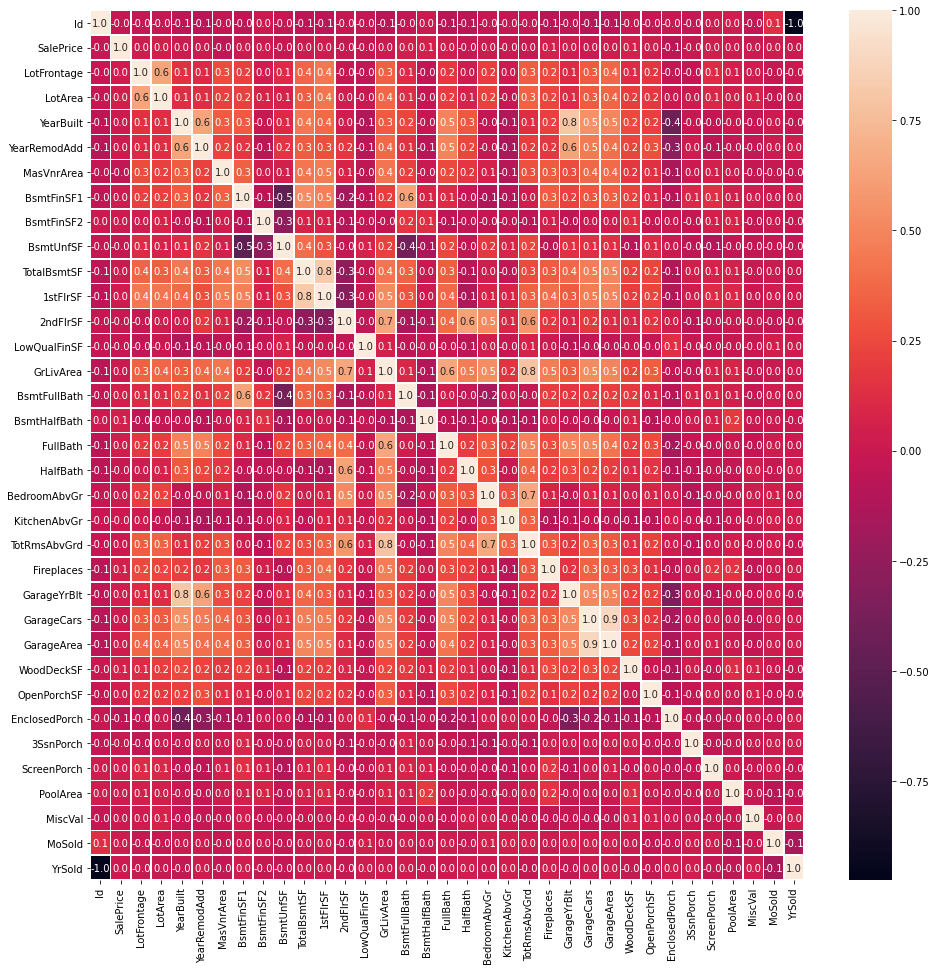

In [844]:
# Nous regardons la corrélation entre les variables 
f,ax = plt.subplots(figsize=(16, 16))
sns.heatmap(maison_test.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


Nous constatons que certaines variables explicatives sont corrélées entre elles . En effet , la variable YearBuilt est corrélée positivement avec la variable YearRemodAdd (0.60). Elle est aussi correlée positivement avec la variable GarageYrBlt (0.80). La variable GarageYrBlt est aussi correlée positivement avec la variable YearRemodAdd (0.60). Les variables TotRmsAbvGrd et GrLivArea sont correlées positivement(0.80).  Les variables GarageCars et GarageArea sont correlées positivement(0.90). La variable BedroomAbvGr est aussi correlée avec la variable TotRmsAbvGrd (0.70). Les variables TotalBmstSF et 2ndFirSF sont aussi corrélées positivement(0.60). 
Aucune variable ne semble etre vraiment corrélée avec la variable à prédire 


Par souci de multicolinéarité , on décide de supprimer les variables YearBuilt , GarageYrBlt ,TotRmsAbvGrd ,  GarageCars  et TotalBmstSF .

In [845]:
maison_test.drop(["YearBuilt","TotalBsmtSF","TotRmsAbvGrd","GarageYrBlt","GarageCars"], axis = 1, inplace = True)

Préparation des bases de données pour l'échantillon 

Echantillonnage des données

Dans cette partie , nous allons créer les bases d'entrainement et les bases de validations de notre base de données. 

In [846]:
X_maison = maison_test.drop(['SalePrice'], axis = 1)# les variables explicatives
Y_maison = maison_test[['SalePrice']]# Variable Target ou variable à prédire 

In [847]:
from sklearn.model_selection import train_test_split

In [848]:
X_train, X_valid , Y_train , Y_valid = train_test_split(X_maison ,Y_maison, random_state=0,train_size=0.7)



MACHINE LEARNING

ARBRE DE DÉCISION

Nous décidons d'utiliser l'arbre de décision car ce dernier utilise à la fois les variables numériques et qualitatves. Vu que notre variable à prédire est continue , nous allons alors utiliser une régression . 

In [850]:
clf = DecisionTreeRegressor()



On a  constaté , la base de donnée ne prend pas en compte les variables de type string

In [851]:
maison_test.drop(["MSZoning","Street","Alley",
                  "LotShape","LandContour","Utilities"
                  ,"LotConfig","LandSlope","Neighborhood"
                  ,"Condition1",
                 "Condition2","BldgType","HouseStyle"
                  ,"RoofStyle","RoofMatl","Exterior1st"
                  ,"Exterior2nd","MasVnrType","ExterQual"
                  ,"ExterCond",
                  "Foundation","BsmtQual","BsmtCond"
                  ,"BsmtExposure","BsmtFinType1","BsmtFinType2"
                  ,"Heating","HeatingQC",
                  "CentralAir","Electrical","KitchenQual"
                  ,"Functional","FireplaceQu","GarageType"
                  ,"GarageFinish","GarageQual","GarageCond"
                  ,"PavedDrive","PoolQC"
                  ,"Fence","MiscFeature","SaleType"
                  ,"SaleCondition"], axis = 1, inplace = True)

In [852]:
X_maison = maison_test.drop(['SalePrice'], axis = 1)# les variables explicatives
Y_maison = maison_test[['SalePrice']]# Variable Target ou variable à prédire 

In [853]:
from sklearn.model_selection import train_test_split
X_train, X_valid , Y_train , Y_valid = train_test_split(X_maison ,Y_maison, random_state=0,train_size=0.7)




In [854]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1286,2747,20,75.0,10170,6,6,1951,522.0,0.0,0.0,...,400.0,0,0,0,0,0,0,0,6,2006
507,1968,20,105.0,13693,8,5,2007,554.0,1728.0,495.0,...,650.0,358,78,0,0,0,0,0,8,2008
1064,2525,80,72.0,9720,5,7,1977,51.0,755.0,0.0,...,576.0,0,0,0,0,0,0,0,6,2007
102,1563,20,65.0,7832,5,5,1968,0.0,775.0,0.0,...,280.0,226,0,0,0,0,0,0,5,2010
453,1914,30,60.0,10200,4,6,1950,0.0,0.0,0.0,...,200.0,0,0,72,0,0,0,0,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,2291,60,110.0,13440,8,5,2007,190.0,0.0,0.0,...,670.0,120,39,0,0,0,0,0,3,2007
905,2366,120,80.0,3523,8,5,2007,30.0,60.0,0.0,...,484.0,0,60,0,0,0,0,0,2,2007
1320,2781,30,50.0,5633,5,7,1950,0.0,0.0,0.0,...,216.0,50,81,123,0,0,0,0,7,2006
601,2062,20,75.0,10425,5,5,1958,0.0,774.0,0.0,...,384.0,0,0,0,0,0,0,0,4,2008


In [855]:
# Nous décidons de standardiser les données car il se peut que les variables n'ont pas la meme mesure

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
Y_train_scaled = scaler.fit_transform(Y_train)
Y_valid_scaled = scaler.transform(Y_valid)

In [856]:
clf.fit(X_train_scaled, Y_train_scaled)# Utilisation de l'arbre de décision


DecisionTreeRegressor()

In [857]:
Y_valid_predict=clf.predict(X_valid_scaled)


In [858]:
Y_valid_predict

array([ 0.84603181, -0.34179929,  0.46693678,  1.12403484,  0.97542959,
        0.25632843, -0.50186164, -0.88095668, -0.48501297,  2.39395266,
       -0.40076963, -0.61980232, -0.57094118, -0.88938101,  1.18300518,
        0.47367625, -0.85629023,  2.61514197, -0.95677568,  1.85695191,
        0.55960445, -0.35022363, -0.71246999,  0.84603181, -0.90622968,
       -0.18173695, -0.68719699, -0.08064494,  0.41135302,  1.81483024,
       -1.63072241,  1.46943254,  2.22762261, -0.64507532, -1.58860074,
       -1.09156503,  1.55367588, -0.83883501,  2.44665529,  0.50905845,
        1.4357352 , -0.57768065, -0.62822665, -0.75459166,  0.13838775,
        0.17040022,  1.11561051,  0.50905845,  0.77863714,  0.25632843,
       -0.95677568, -0.0216746 , -0.59452932,  0.10469041,  1.31779452,
       -0.48501297, -0.67034832, -1.06629203,  0.3742691 , -0.72089433,
        0.3742691 , -0.67034832, -0.30978682,  0.0035984 , -0.11434227,
       -0.54398331,  0.17208509, -0.0216746 , -0.57768065, -1.63

In [859]:
Y_valid_pred_inverse  = scaler.inverse_transform(Y_valid_predict) # Véritable valeur prédite 

In [860]:
Y_valid_pred_inverse

array([220000., 149500., 197500., 236500., 227680., 185000., 140000.,
       117500., 141000., 311872., 146000., 133000., 135900., 117000.,
       240000., 197900., 118964., 325000., 113000., 280000., 203000.,
       149000., 127500., 220000., 116000., 159000., 129000., 165000.,
       194201., 277500.,  73000., 257000., 302000., 131500.,  75500.,
       105000., 262000., 120000., 315000., 200000., 255000., 135500.,
       132500., 125000., 178000., 179900., 236000., 200000., 216000.,
       185000., 113000., 168500., 134500., 176000., 248000., 141000.,
       130000., 106500., 192000., 127000., 192000., 130000., 151400.,
       170000., 163000., 137500., 180000., 168500., 135500.,  73000.,
       229000., 117000., 248000., 157900., 108000., 157500., 118500.,
       158000., 160000., 216500., 244000., 309000., 302000., 231500.,
        84500.,  83500., 151000., 167000., 108000., 310000.,  40000.,
       117000., 161000., 324000., 110000., 167900., 176000., 176000.,
       143000., 3200

In [861]:
# on va calculer les mesures de performances 
from sklearn.metrics import r2_score



In [862]:
from sklearn.metrics import mean_squared_error

In [863]:
R2_CART=r2_score(Y_valid,Y_valid_pred_inverse) # On calcule ic le coeficient de détermination


In [864]:
R2_CART # Il est négatif , le modèle ne donne pas une bonne prédiction

-1.027049600465515

In [865]:
RMSE_CART = mean_squared_error(Y_valid,Y_valid_pred_inverse)# Calcul du erreus quadratiques moyennes du modèle


In [866]:
RMSE_CART # Il y'a beaucoup d'erreurs lord de la prévision 

7342216204.59057

BAGGING

Nous utilisons le Bagging pour essayer de prédire la variable SalePrice. 

In [898]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [899]:
bagging = BaggingRegressor(
KNeighborsRegressor(),
n_estimators= 10)


In [900]:
clf=bagging.fit(X_train_scaled, Y_train_scaled)
Y_valid_predict_BAG=clf.predict(X_valid_scaled)


/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [901]:
Y_valid_predict_BAG

array([-0.05240657, -0.25129398,  0.23671658,  0.59623346,  0.0271178 ,
       -0.08131888, -0.598573  ,  0.17174811,  0.027692  ,  0.22027902,
        0.44076069, -0.64245704,  0.35799329, -0.02920932, -0.2150097 ,
        0.07598028, -0.40786023,  0.04002691,  0.97323926,  0.26818989,
       -0.09555601, -0.33960897,  0.0653454 ,  0.24242221, -0.70219231,
        0.27503045,  0.02668108, -0.47102858, -0.03346867, -0.46833279,
        0.3882535 , -0.60955833,  0.11227231,  0.0517856 , -0.12263182,
       -0.16573071,  0.94971852,  0.22947165,  0.28975619, -0.51384104,
       -0.09194028,  0.01897281, -0.39443453, -0.44002703, -0.71736959,
       -0.41694435, -0.04772264, -0.13108311,  0.68829458,  0.20035715,
       -0.67388991,  0.60812862, -0.19150917,  0.38543674,  0.01364324,
       -0.6732126 , -0.4924365 , -0.43402756, -0.3341163 ,  0.54622661,
        0.20174717, -0.08529517, -0.53475024,  0.62383158,  0.66500972,
       -0.63809997,  0.37241575,  0.03820557, -0.29007388, -0.10

In [871]:
Y_valid_predict_BAG_inverse = scaler.inverse_transform(Y_valid_predict_BAG) # Véritable prédiction de la variable SalePrice

In [902]:
R2_BAG=r2_score(Y_valid,Y_valid_predict_BAG_inverse ) 

In [903]:
R2_BAG # Mauvaise prédiction du la variable

-0.1020444196424668

In [904]:
RMSE_BAG = mean_squared_error(Y_valid,Y_valid_predict_BAG_inverse )

In [905]:
RMSE_BAG# le modèle ne prédit pas du tout notre variable

3991736755.83435

RANDOM FOREST

In [906]:
clf = RandomForestRegressor()

In [907]:
clf.fit(X_train_scaled, Y_train_scaled)
Y_valid_predict_rand = clf.predict(X_valid_scaled)



<ipython-input-907-a63aced472ed>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_scaled, Y_train_scaled)


In [908]:
Y_valid_predict_rand

array([ 1.37468655e-01,  9.96944465e-02, -3.82496072e-01,  4.53673677e-01,
       -1.85896067e-02, -8.66469376e-02, -2.03948040e-01,  9.25576876e-02,
       -1.94591469e-01,  1.93187706e-01,  1.64140939e-01, -3.80848104e-01,
        3.07956959e-01, -4.10115420e-01, -1.60207212e-01,  1.95038196e-01,
       -1.96711874e-01,  7.17467546e-01, -4.19949620e-03,  8.21453988e-01,
        1.43406631e-01,  3.01235997e-02,  1.11371079e-01,  1.57084212e-01,
       -1.63782331e-01,  1.51024757e-01,  8.41025204e-02, -1.39068536e-01,
       -1.22608061e-01, -1.33654048e-01,  6.48728855e-01,  4.22969310e-02,
        8.68586256e-02,  3.13670174e-01, -3.34235112e-02, -3.27004310e-01,
        2.77354695e-02,  8.53599366e-02,  1.04399760e+00,  3.95881706e-02,
        2.04985312e-01,  5.72494360e-01, -2.27329442e-01,  6.73168663e-02,
       -2.81324200e-01, -3.69352258e-01,  1.16618400e-02,  1.77084760e-01,
       -4.28404003e-02,  7.72356772e-02, -1.44418157e-01,  4.54510550e-01,
       -2.57602118e-01,  

In [879]:
Y_valid_predict_rand_inverse = scaler.inverse_transform(Y_valid_predict_rand) # véritable prédiction de notre modèle 

In [909]:
R2_RANDG=r2_score(Y_valid,Y_valid_predict_rand_inverse) 

In [911]:
R2_RANDG # Il semblerait que le modèle prédit mal notre variable SalePrice.

-0.06716670657557477

In [912]:
RMSE_rand = mean_squared_error(Y_valid,Y_valid_predict_rand_inverse)

In [913]:
RMSE_rand # Mauvaise qualité de prévision

3865405505.725825

BOOSTING

In [914]:
from sklearn.ensemble import AdaBoostRegressor


In [915]:
from sklearn.neighbors import KNeighborsRegressor


In [916]:

boosting = AdaBoostRegressor(
KNeighborsRegressor(),
n_estimators= 10)


In [917]:
clf=boosting.fit(X_train_scaled, Y_train_scaled)
Y_valid_precd_boo=clf.predict(X_valid_scaled)


/Users/keitasita/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [918]:
Y_valid_precd_boo

array([-3.38092587e-01, -6.73266513e-01,  6.53956997e-01,  1.66356539e-01,
       -1.44669876e-01, -2.45761885e-01, -5.03546508e-01, -2.16745979e-02,
       -4.19303167e-01,  1.80848166e+00,  6.09442815e-01, -5.09157115e-01,
        7.84702662e-01, -5.41792985e-01, -5.72626048e-01,  2.86656030e-01,
       -6.23030524e-01,  1.99042955e-01,  1.36328593e+00,  2.39479759e-01,
       -1.14342273e-01, -5.64201714e-01,  4.06654744e-02,  9.67342225e-01,
       -8.75902075e-01,  1.12234997e+00,  5.25907118e-01, -3.55278228e-01,
       -1.76309175e-02, -8.99490211e-01,  1.84684270e+00, -4.41543409e-01,
        3.64159904e-01,  5.41070920e-01, -5.87416679e-02, -5.40613578e-01,
        9.80821160e-01,  2.36110025e-01, -1.05544769e-02, -3.88133131e-01,
       -2.12401522e-01,  3.79323705e-01, -2.51153459e-01,  2.51273827e-01,
       -7.26285902e-01, -3.53593361e-01, -4.91752440e-01,  5.77430346e-01,
        1.32453399e+00,  1.46475111e-01, -5.77680648e-01,  1.14728600e+00,
       -4.18929997e-02,  

In [919]:
Y_valid_precd_boo_inverse = scaler.inverse_transform(Y_valid_precd_boo) # prédiction de notre variable 

In [890]:
R2_BOO=r2_score(Y_valid,Y_valid_precd_boo_inverse) 

In [891]:
R2_BOO # Mauvaise qualité du modèle

-0.2684198001428104

In [892]:
RMSE_Boo = mean_squared_error(Y_valid,Y_valid_precd_boo_inverse)

In [920]:
RMSE_Boo # Mauvaise qualité de prédiction de notre variable SalePrice

4594368292.070074

OPTIMASATION DU MEILLEUR MODÈLE

En général , tous nos modèles ne prédisent pas bien la vaiable SalePrice. Cependant , s'il faut faire un choix entre ces modèles , on choisira le modèle ayant le RMSE le plus petit. 

In [922]:
RMSE_Boo# rsme du Boosting


4594368292.070074

In [923]:
RMSE_rand # rmse du random_forest

3865405505.725825

In [924]:
RMSE_BAG # rmse du Bagging

3991736755.83435

In [925]:
RMSE_CART # rmse de l'arbre de décision

7342216204.59057

S'il faudrait choisir un modèle , on choisira le random_forest. 

Importation du la prédiction de SalePrice par random forest

In [930]:
submission=pd.DataFrame(Y_valid_predict_rand_inverse)
submission.to_csv('submission.csv', index=False)